## Import CSV

In [1]:
import pandas
def read_csv(filename,folder):
    folder=folder+"/"+filename+".csv"
    return pandas.read_csv(folder,encoding='ISO-8859-1')

In [2]:
folder="/Users/mac/Desktop/bigdataanalysis/test"
data=read_csv(filename="Result",folder=folder)
data = data.fillna(method='ffill')
data = data.sort_values(by="Date",ascending=False)
data.head()

,Date,vix,vfx,vbx,rom,vmt,rwm,dog,psh,spx,gld
0,2020-10-30,38.020000,302.040009,11.53,22.030001,23.377001,33.040001,45.680000,20.750000,6734.839844,176.199997
1,2020-10-29,37.590000,305.720001,11.56,22.139999,23.607000,32.619999,45.419998,20.549999,6816.790039,175.399994
2,2020-10-28,40.279999,302.079987,11.59,21.975000,23.517000,33.000000,45.630001,20.760000,6735.750000,176.130005
3,2020-10-27,33.349998,313.140015,11.59,22.725000,23.867001,32.009998,44.139999,20.070000,6982.140137,179.020004
4,2020-10-26,32.459999,314.079987,11.57,22.757000,23.931000,31.730000,43.779999,20.010000,7003.209961,178.550003


In [3]:
data2 = read_csv(filename="Result2",folder=folder)
data= pandas.merge(data,data2,on=['Date'],how = 'outer')
data = data.sort_values(by="Date",ascending=True)


In [4]:
data = data.fillna(method='bfill')
data = data.rename(columns = {'Unemployment Rate in the United States (DISCONTINUED)':'Unemployment_Rate','Consumer Price Index for All Urban Consumers: All Items in U.S. City Average':'CPI'})
data.head()

,Date,vix,vfx,vbx,rom,vmt,rwm,dog,psh,spx,gld,Unemployment_Rate,CPI
3483,2007-01-01,12.04,99.608803,6.436509,25.095781,24.101154,196.387619,207.181107,99.698906,2183.919922,62.279999,4.6,202.416
3484,2007-01-02,12.04,99.608803,6.436509,25.095781,24.101154,196.387619,207.181107,99.698906,2183.919922,62.279999,4.6,202.416
3482,2007-01-03,12.04,99.608803,6.436509,25.095781,24.101154,196.387619,207.181107,99.698906,2183.919922,62.279999,4.6,202.416
3481,2007-01-04,11.51,99.730949,6.455796,25.095781,24.101154,196.387619,207.214310,99.331474,2186.600098,61.650002,4.6,202.416
3480,2007-01-05,12.14,99.127716,6.442942,25.095781,24.101154,196.387619,208.639679,100.162170,2173.290039,60.169998,4.6,202.416


## Visualize Data

In [5]:
from matplotlib import pyplot
def plot_data(dataset,groups):
    i = 1
    pyplot.figure()
    values = dataset.values
    for group in groups:
    	pyplot.subplot(len(groups), 1, i)
    	pyplot.plot(values[:, group])
    	pyplot.title(dataset.columns[group], y=0.5, loc='right')
    	i += 1
    pyplot.show()

In [ ]:
plot_data(data,groups=list(range(1,12)))

## Data Summary

In [ ]:
data.describe()

## Independent and identically distributed (I.I.D.) Testing

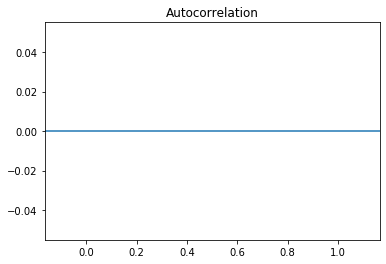

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(data['vix'].values, lags=40)
plt.show()

## Histogram

In [ ]:
data.plot(kind="hist",bins=50)

## Normal Test 

In [ ]:
from scipy import stats
print(stats.shapiro(data['vfx'].values))
# print(stats.shapiro(data['VBMFX'].values))

## *** LSTM ***

In [8]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def Standard_MinMax(data):
    sc = MinMaxScaler(feature_range = (0, 1))
    return sc.fit_transform(data.reshape(-1,1))

In [12]:
# folder="/Users/mac/Desktop/bigdataanalysis/test"
# data=read_csv(filename="Result",folder=folder)
# del data['Date']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)
scaled

array([[0.03942895, 0.17741822, 0.01195597, ..., 0.01577924, 0.03571429,
        0.        ],
       [0.03942895, 0.17741822, 0.01195597, ..., 0.01577924, 0.03571429,
        0.        ],
       [0.03942895, 0.17741822, 0.01195597, ..., 0.01577924, 0.03571429,
        0.        ],
       ...,
       [0.38681168, 0.91311136, 0.96458373, ..., 0.86172595, 0.57142857,
        1.        ],
       [0.39265805, 0.899976  , 0.9590056 , ..., 0.86770863, 0.57142857,
        1.        ],
       [       nan,        nan,        nan, ...,        nan, 0.57142857,
        1.        ]])

## Series to Supervised

In [13]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pandas.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
    
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [14]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t)
1,0.039429,0.177418,0.011956,0.696,0.397521,0.512624,0.538509,0.497274,0.173847,0.015779,...,0.011956,0.696,0.397521,0.512624,0.538509,0.497274,0.173847,0.015779,0.035714,0.0
2,0.039429,0.177418,0.011956,0.696,0.397521,0.512624,0.538509,0.497274,0.173847,0.015779,...,0.011956,0.696,0.397521,0.512624,0.538509,0.497274,0.173847,0.015779,0.035714,0.0
3,0.039429,0.177418,0.011956,0.696,0.397521,0.512624,0.538509,0.497274,0.173847,0.015779,...,0.015542,0.696,0.397521,0.512624,0.538618,0.495004,0.174275,0.011068,0.035714,0.0
4,0.032223,0.177854,0.015542,0.696,0.397521,0.512624,0.538618,0.495004,0.174275,0.011068,...,0.013152,0.696,0.397521,0.512624,0.543265,0.500136,0.172150,0.000000,0.035714,0.0
5,0.040789,0.175701,0.013152,0.696,0.397521,0.512624,0.543265,0.500136,0.172150,0.000000,...,0.013152,0.696,0.397521,0.512624,0.542508,0.498952,0.173029,0.002318,0.035714,0.0


In [ ]:
# pred = {'VFINX':13}
# reframed = pandas.concat([reframed.iloc[:,0:12],reframed.iloc[:,pred['VFINX']]],axis=1)
reframed.head()
# reframed.shape

## Data Split

In [ ]:
train = reframed.values[:5000,:]
test = reframed.values[5000:5051,:]
train_X, train_y = train[:, :-1], train[:, -1]
test_X , test_y  = test[:, :-1], test[:, -1]
train_X.shape, train_y.shape, test_X.shape, test_y.shape

In [ ]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X  = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape, train_y.shape, test_X.shape, test_y.shape


## LSTM

In [ ]:
import keras
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

## Training

In [ ]:
history = model.fit(train_X, train_y, epochs=100, 
                    batch_size=128, validation_data=(test_X, test_y), 
                    verbose=1, shuffle=False)

## Plot Loss Curve

In [ ]:
%pylab inline
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
test_X.shape

## Model Predict

In [ ]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
yhat.shape, test_X.shape
# yhat

## Invert scaling for forecast

In [ ]:
pred = {'VFINX': 2}
inv_yhat = concatenate((yhat, numpy.delete(test_X, pred['VFINX'], axis=1)), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat

## Invert scaling for actual

In [ ]:
real = test_y.reshape((len(test_y), 1))
inv_y = concatenate((real, numpy.delete(test_X, pred['VFINX'], axis=1)), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y

# RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
inv_y = np.cumprod(inv_y+1)
inv_yhat = np.cumprod(inv_yhat+1)

## Predict vs Real

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(inv_y, color = 'red', label = 'Real')
plt.plot(inv_yhat, color = 'blue', label = 'Predict')
plt.title('Real vs Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()